In [86]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sign(x):
    if x>0:
        y=1
    else:
        y=0
    return y

# time stamps maker
def poisson_process_maker(rate, size, bin_time):
    theta = 1 - np.exp(-rate*bin_time)
    proceso = np.zeros(size)
    for i in range(size):
        u = np.random.uniform(0, 1)
        proceso[i] = sigmoid(1000*(u-1+theta))
        # proceso[i] = sign(u-1+theta)
    return proceso

/tmp/ipykernel_4135043/2920934667.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


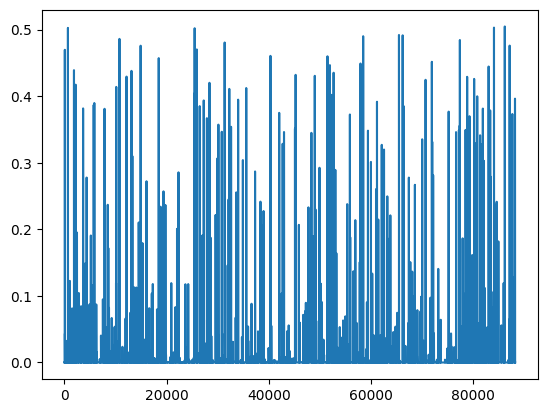

In [87]:
import matplotlib.pyplot as plt

sr = 44100
bin_time = 1/sr
rate = 1
size = 88200

proceso = poisson_process_maker(rate, size, bin_time)

plt.plot(proceso)
plt.show()


In [88]:
import librosa

noise, _ = librosa.load("sounds/water.wav", sr=44100)

def noise_generator(seed, grain_size):
    N = np.size(seed)
    total = N - grain_size
    random = int(np.random.uniform(0, 1) * total)
    return seed[random: random + grain_size]

def synth(time_stamps, seed, grain_size, convolution_rate, sr):
    patches_size = sr // convolution_rate
    final_size = np.size(time_stamps)+grain_size-1
    final_signal = np.zeros(final_size)
    amount_of_patches = np.size(time_stamps) // patches_size
    for i in range(amount_of_patches):
        time_stamps_local     = time_stamps[patches_size*i:patches_size*(i+1)]
        noise_generated_local = noise_generator(seed, grain_size)
        synth_local           = np.convolve(noise_generated_local, time_stamps_local)
        final_signal[patches_size*i:patches_size*(i+1)+grain_size-1] += synth_local
    return final_signal
        

In [90]:
from IPython.display import Audio

for i in range(10):
    sr = 44100
    bin_time = 1/sr
    rate = 2*i+1
    size = 88200

    proceso = poisson_process_maker(rate, size, bin_time)

    # plt.plot(proceso)
    # plt.show()

    grain_size = sr // rate*2
    convolution_rate = 5

    synthesized_signal = synth(proceso, noise, grain_size, convolution_rate, sr)

    # plt.plot(synthesized_signal)
    # plt.show()

    print("Audio resynthesized:")
    display(Audio(data=synthesized_signal, rate=44100))


/tmp/ipykernel_4135043/2920934667.py:4: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:


Audio resynthesized:
